In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("garments_worker_productivity.csv")

#This dataset is collected from Kaggle (https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees)

In [3]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
#COLUMN HEADER DETAILS
# date : Date in MM-DD-YYYY
# day : Day of the Week
# quarter : A portion of the month. A month was divided into four quarters
# department : Associated department with the instance
# team_no : Associated team number with the instance
# no_of_workers : Number of workers in each team
# no_of_style_change : Number of changes in the style of a particular product
# targeted_productivity : Targeted productivity set by the Authority for each team for each day.
# smv : Standard Minute Value, it is the allocated time for a task
# wip : Work in progress. Includes the number of unfinished items for products
# over_time : Represents the amount of overtime by each team in minutes
# incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
# idle_time : The amount of time when the production was interrupted due to several reasons
# idle_men : The number of workers who were idle due to production interruption
# actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [8]:
#Creating a list of new column names
new_col_names = ["Date","Quarter","Department","Day","Team Number","Targeted Productivity%","Standard Minute Value","Work-in-Progress","Over Time(mins)","Incentive(BDT)","Idle Time(mins)","Idle Worker","Number of Style Change","Number of Worker","Actual Productivity%"]

In [9]:
#Assigning new column names to DataFrame
df.columns = new_col_names
df.head()

,Date,Quarter,Department,Day,Team Number,Targeted Productivity%,Standard Minute Value,Work-in-Progress,Over Time(mins),Incentive(BDT),Idle Time(mins),Idle Worker,Number of Style Change,Number of Worker,Actual Productivity%
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [20]:
#Cleaning Department Column

df["Department"] = df["Department"].str.strip().str.lower()

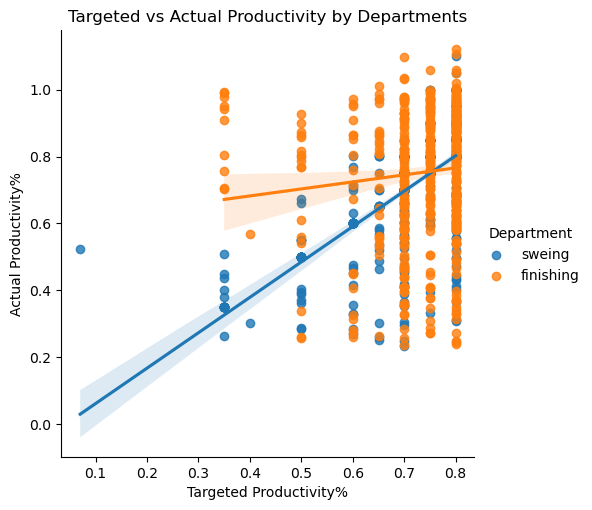

In [21]:
#Correlation between Actual and Targeted Productivity

sns.lmplot(df,x="Targeted Productivity%",y="Actual Productivity%",hue="Department")
plt.title("Targeted vs Actual Productivity by Departments")
plt.show()

C:\Users\gnsaq\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gnsaq\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


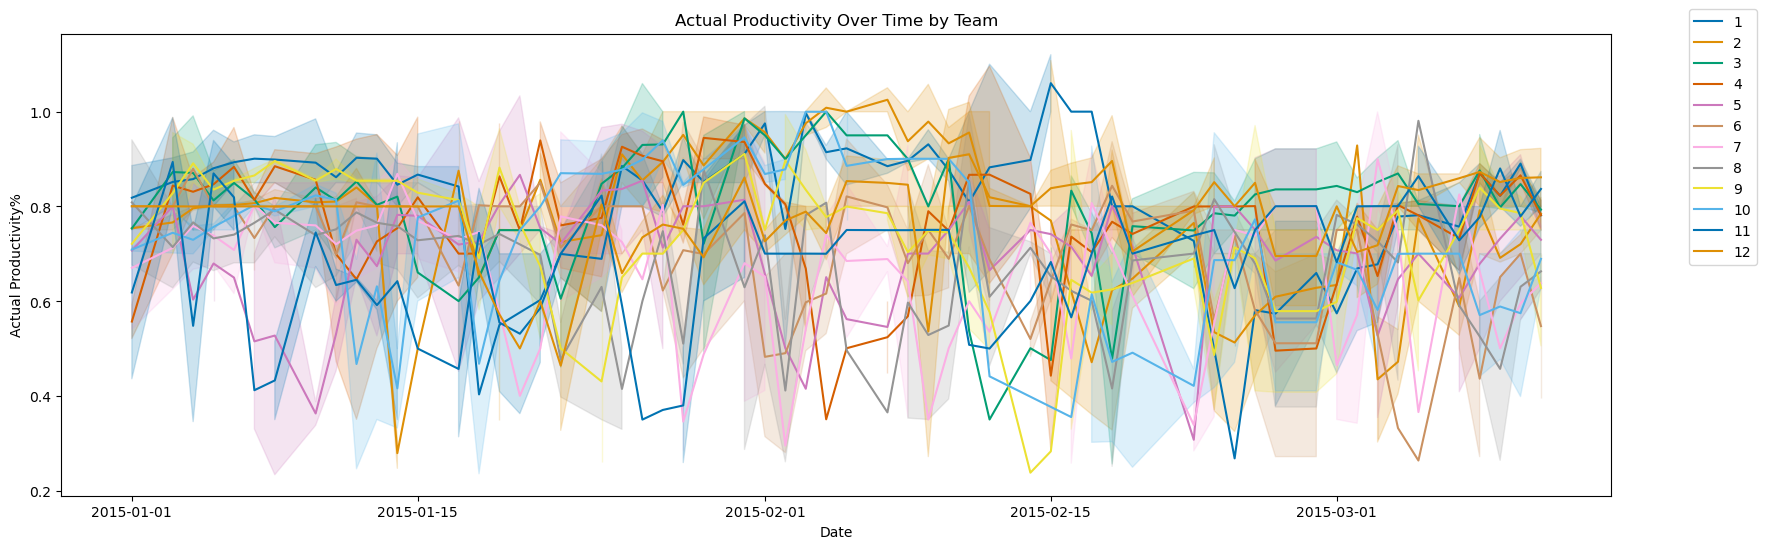

In [22]:
#Productivity Over Time

df["Date"] = pd.to_datetime(df["Date"])
plt.figure(figsize=(20,6))
sns.lineplot(df,x="Date",y="Actual Productivity%",hue="Team Number",palette="colorblind")
plt.title("Actual Productivity Over Time by Team")
plt.legend(loc=(1.05,0.5))
plt.show()

<Axes: xlabel='Department', ylabel='Actual Productivity%'>

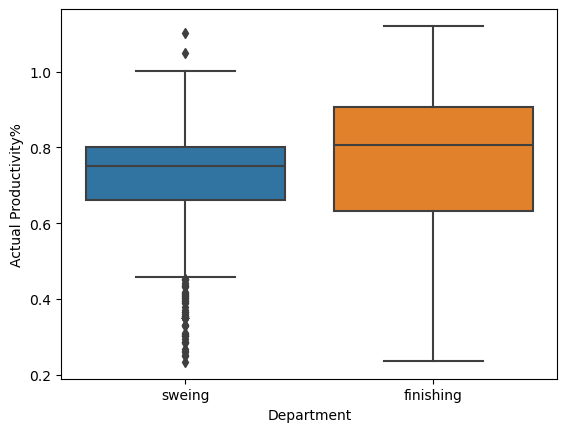

In [23]:
#Department Wise Productivity Comparison

sns.boxplot(df,x="Department",y="Actual Productivity%")

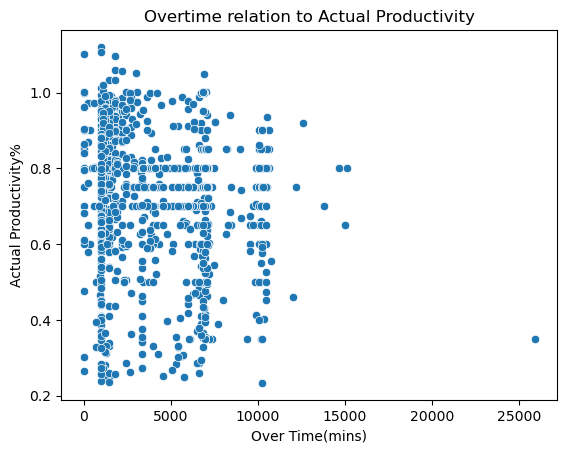

In [25]:
#Impact of Overtime on Productivity

sns.scatterplot(df,x="Over Time(mins)",y="Actual Productivity%")
plt.title("Overtime relation to Actual Productivity")
plt.show()

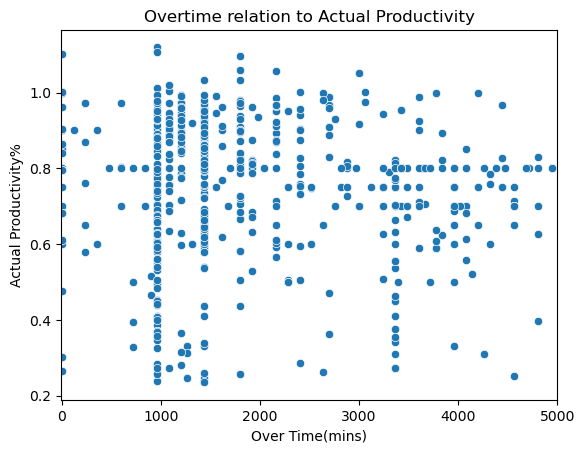

In [41]:
#PT2 Zoomed In

sns.scatterplot(df,x="Over Time(mins)",y="Actual Productivity%")
plt.title("Overtime relation to Actual Productivity")
plt.xlim(-2,5000)
plt.show()

C:\Users\gnsaq\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


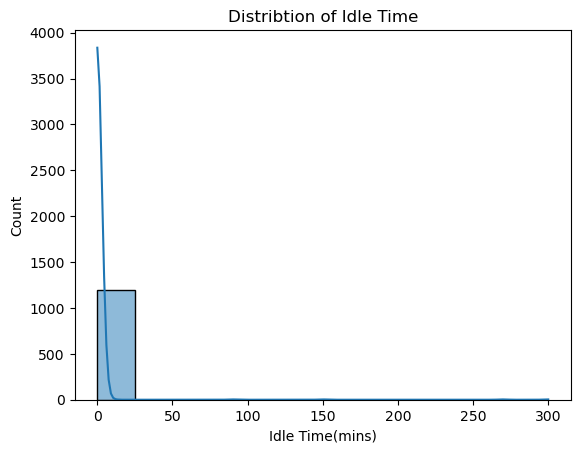

In [28]:
#Distribution of Idle Time

sns.histplot(df["Idle Time(mins)"],kde=True)
plt.title("Distribtion of Idle Time")
plt.show()

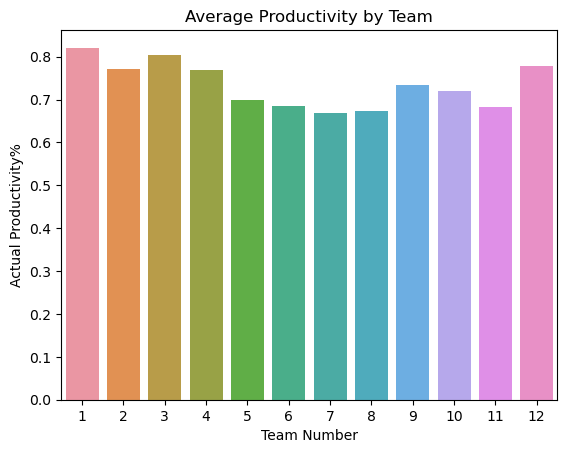

In [30]:
team_avg_productivity = df.groupby("Team Number")["Actual Productivity%"].mean().reset_index()
sns.barplot(team_avg_productivity,x="Team Number",y="Actual Productivity%")
plt.title("Average Productivity by Team")
plt.show()

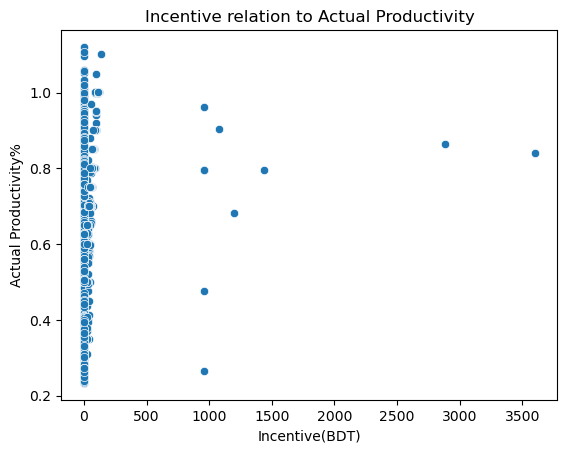

In [31]:
#Impact of Incentives on Productivity

sns.scatterplot(df,x="Incentive(BDT)",y="Actual Productivity%")
plt.title("Incentive relation to Actual Productivity")
plt.show()

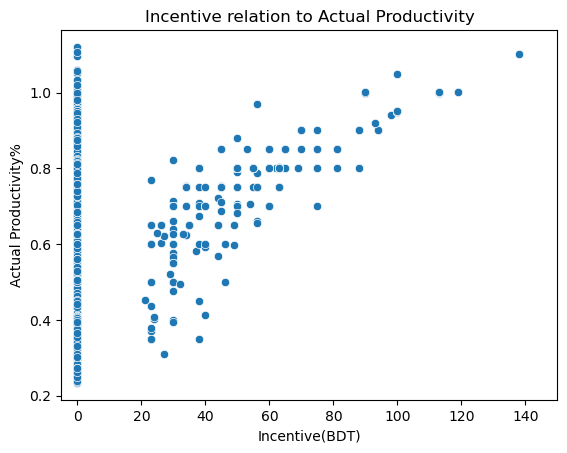

In [40]:
#PT2 Zoomed In

sns.scatterplot(df,x="Incentive(BDT)",y="Actual Productivity%")
plt.title("Incentive relation to Actual Productivity")
plt.xlim(-5,150)
plt.show()

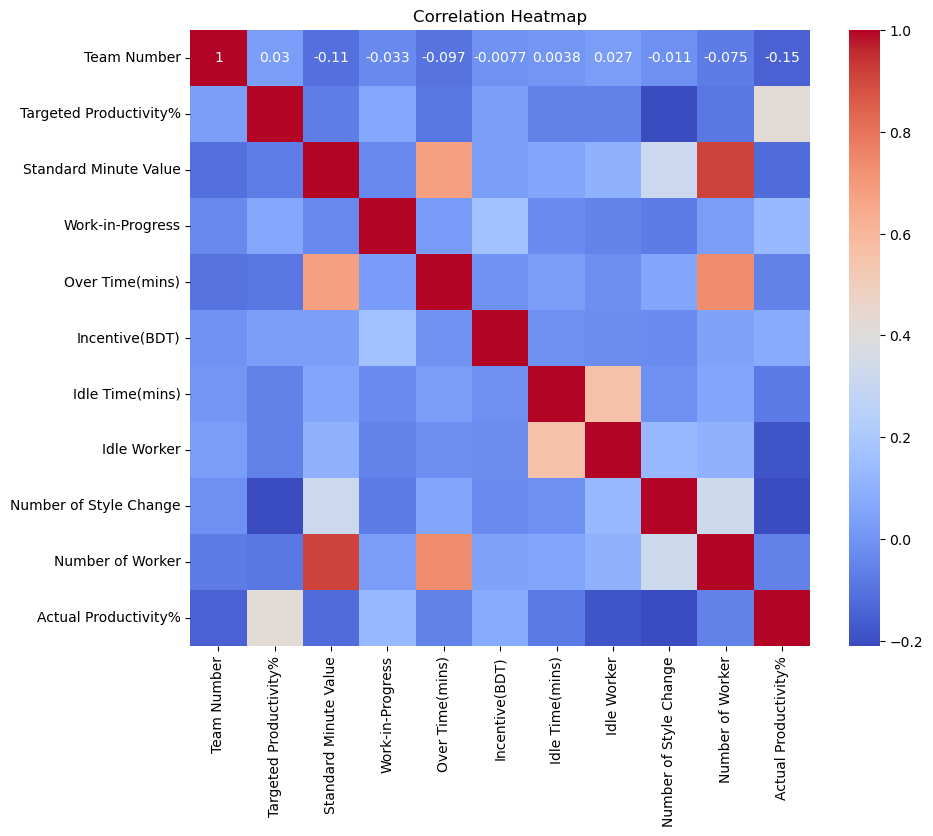

In [56]:
#Heatmap of Correlations

numeric_data = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

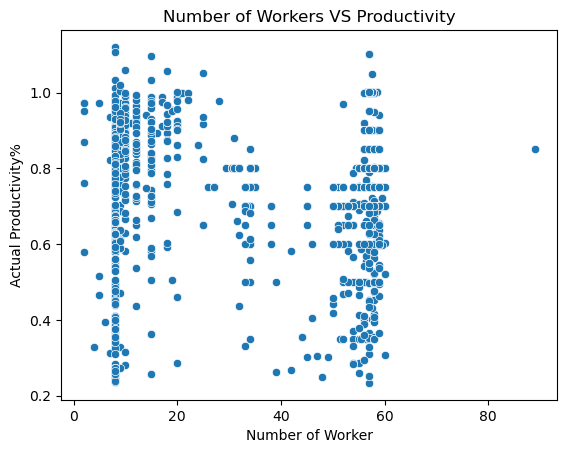

In [57]:
#Worker Count and Productivity

sns.scatterplot(df,x="Number of Worker",y="Actual Productivity%")
plt.title("Number of Workers VS Productivity")
plt.show()

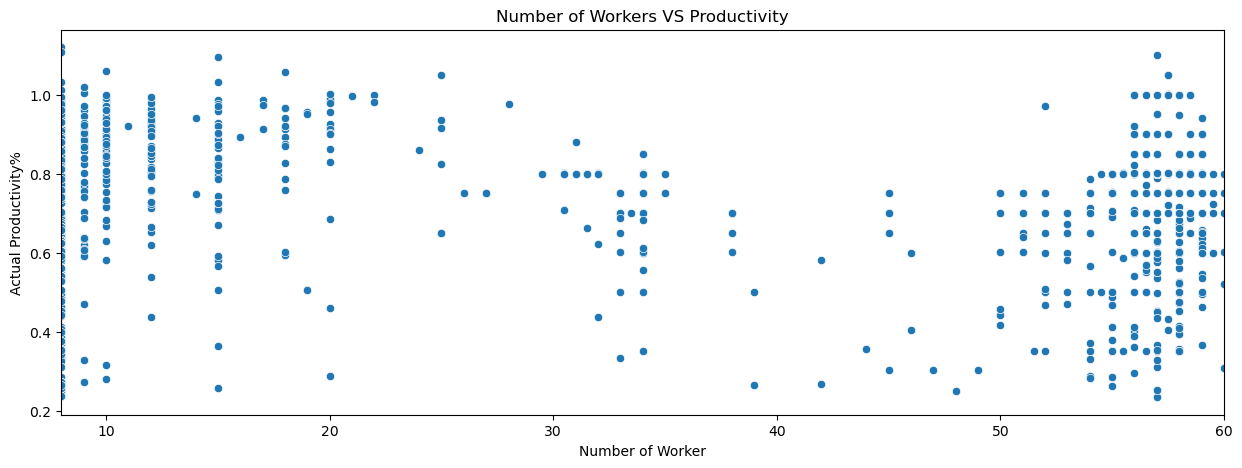

In [61]:
#PT2 Zoomed In

plt.figure(figsize=(15,5))
sns.scatterplot(df,x="Number of Worker",y="Actual Productivity%")
plt.title("Number of Workers VS Productivity")
plt.xlim(8,60)
plt.show()

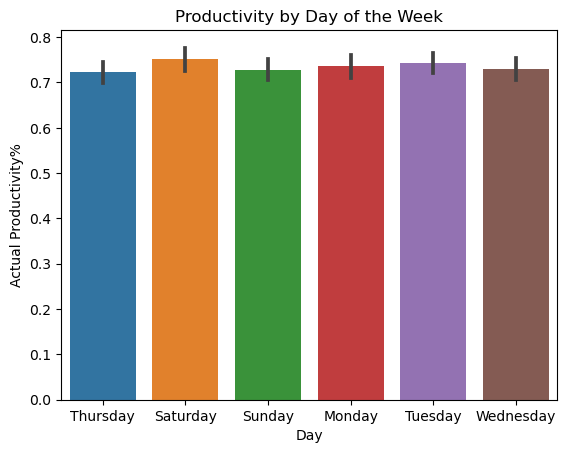

In [71]:
#Productivity by Day of the Week

sns.barplot(df,x="Day",y="Actual Productivity%")
plt.title("Productivity by Day of the Week")
plt.show()

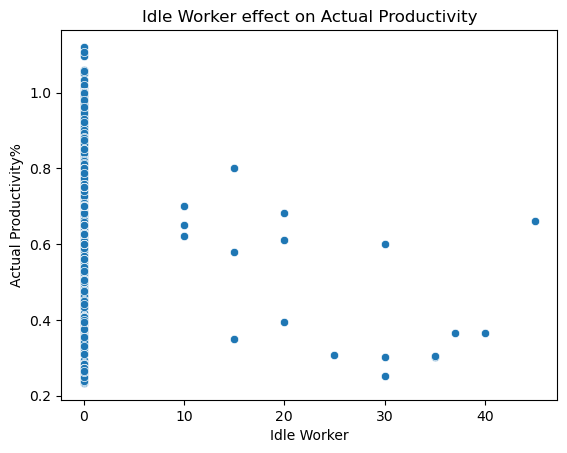

In [72]:
#Effective of Idle Worker on Productivity

sns.scatterplot(df,x="Idle Worker",y="Actual Productivity%")
plt.title("Idle Worker effect on Actual Productivity")
plt.show()

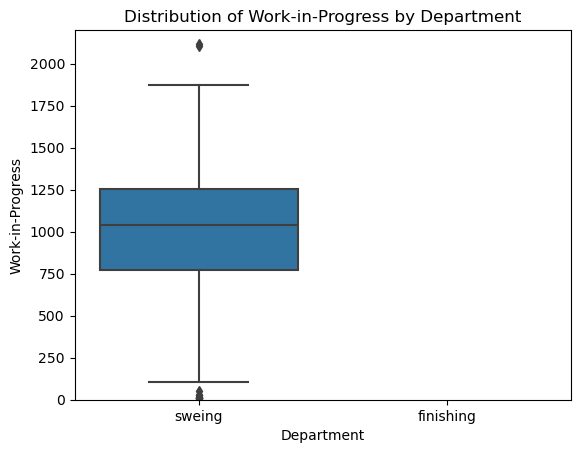

In [81]:
#Distribution of Work-in-Progress

sns.boxplot(df,x="Department",y="Work-in-Progress")
plt.title("Distribution of Work-in-Progress by Department")
plt.ylim(0,2200)
plt.show()

C:\Users\gnsaq\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gnsaq\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


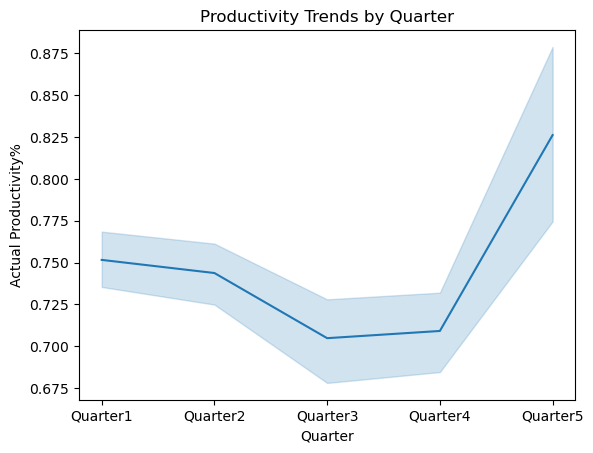

In [82]:
#Trend of Productivity Over Quarter

sns.lineplot(df,x="Quarter",y="Actual Productivity%")
plt.title("Productivity Trends by Quarter")
plt.show()

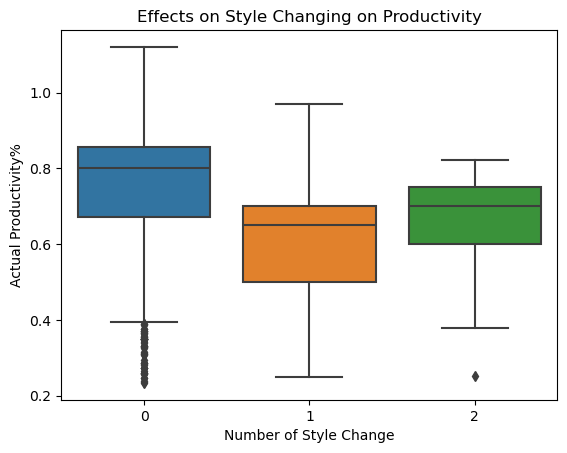

In [83]:
#Effects on Style Changing on Productivity

sns.boxplot(df,x="Number of Style Change",y="Actual Productivity%")
plt.title("Effects on Style Changing on Productivity")
plt.show()

In [84]:
#Predicting Productivity Using Machine Learning (Regression)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [85]:
X = df[["Targeted Productivity%","Over Time(mins)","Incentive(BDT)","Idle Time(mins)","Number of Worker"]]
y = df["Actual Productivity%"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.025106168092580556
